# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [9]:
pip install matplotlib


     ---------------------------------------- 7.2/7.2 MB 310.9 kB/s eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 308.1 kB/s eta 0:00:00
     ------------------------------------ 929.9/929.9 KB 267.6 kB/s eta 0:00:00
     -------------------------------------- 55.3/55.3 KB 479.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [10]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [17]:


# load the training dataset
data = pd.read_csv('data/real_estate.csv',
                    parse_dates = ['transaction_date'],
                    infer_datetime_format = True)
#data["transaction_date"] = data.transaction_date.dt.to_period('D')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [25]:
data.isnull().sum()

transaction_date            0
house_age                   0
transit_distance            0
local_convenience_stores    0
latitude                    0
longitude                   0
price_per_unit              0
dtype: int64

In [20]:
#data['transaction_date'] = pd.DatetimeIndex(data["transaction_date"])
print("Shape :", data.shape)

numeric_features = ["house_age", "transit_distance","local_convenience_stores"]
data[numeric_features +  ["price_per_unit"]].describe()

Shape : (414, 7)


,house_age,transit_distance,local_convenience_stores,price_per_unit
count,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,37.980193
std,11.392485,1262.109595,2.945562,13.606488
min,0.000000,23.382840,0.000000,7.600000
25%,9.025000,289.324800,1.000000,27.700000
50%,16.100000,492.231300,4.000000,38.450000
75%,28.150000,1454.279000,6.000000,46.600000
max,43.800000,6488.021000,10.000000,117.500000


AttributeError: 'AxesSubplot' object has no attribute 'set_xabel'

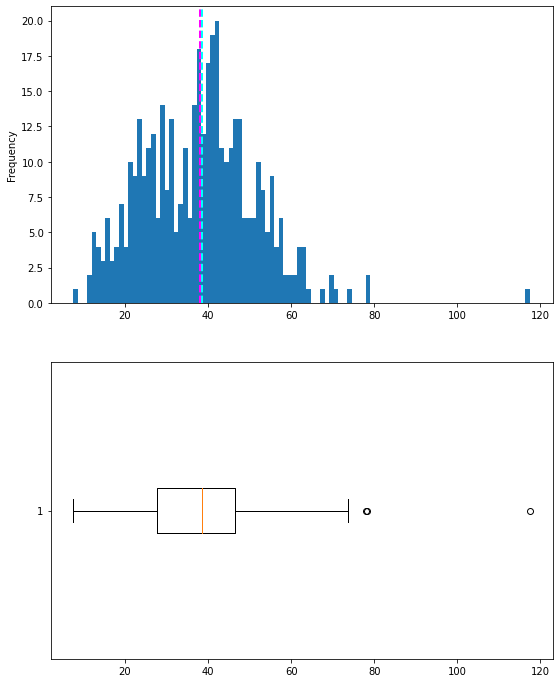

In [24]:
label = data["price_per_unit"]
fig,ax = plt.subplots(2,1,figsize=(9,12))
ax[0].hist(label,bins = 100)
ax[0].set_ylabel("Frequency")

ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

ax[1].boxplot(label,vert = False)
ax[1].set_xabel("Price per unit")

fig.suptitle("Property Price")
fig.show()

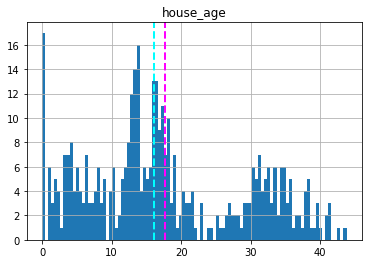

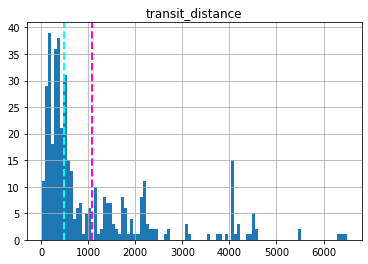

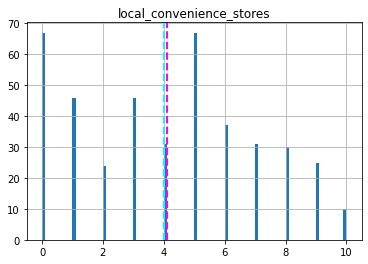

In [30]:
# Plot a histogram for each numeric feature
for col in numeric_features:
    #fig = plt.figure(figsize = (9,6))
    #data[col].hist(bins = 100, ax = )
    data[col].hist(bins = 100)
    plt.title(col)
    plt.axvline(data[col].mean(),color = 'magenta', linestyle = 'dashed', linewidth = 2)
    plt.axvline(data[col].median(),color = 'cyan', linestyle = 'dashed', linewidth = 2)
    plt.show()

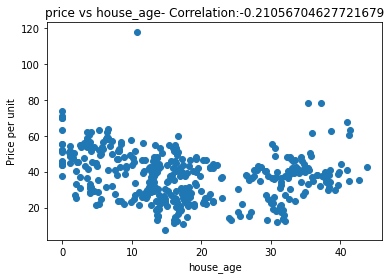

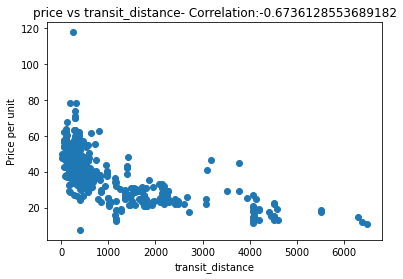

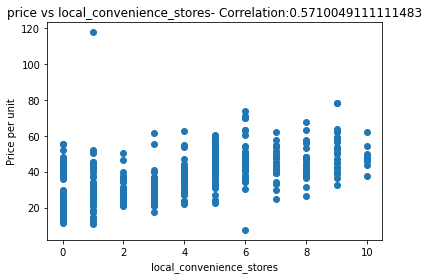

In [34]:
for col in numeric_features:
    feature = data[col]
    label = data["price_per_unit"]
    correlation = feature.corr(label)
    plt.scatter(feature, y = label )
    plt.xlabel(col)
    plt.ylabel("Price per unit")
    plt.title("price vs " + col + "- Correlation:" + str(correlation))
    plt.show()

The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

In [ ]:
# Your code to explore data and train a regression model

## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [ ]:
# Your code to use the trained model